In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Input, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
from tensorflow.keras.applications.vgg16 import VGG16

In [3]:
vgg16_model = keras.applications.VGG16(input_shape=(32, 32, 3), include_top=False)
vgg16_model.trainable=False 

inputs = vgg16_model.inputs
x = vgg16_model.output

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,982,474 (57.15 MB)

 Trainable params: 267,786 (1.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
import cv2

x_train=np.array([cv2.resize(image,(32,32)) for image in x_train])
x_test = np.array([cv2.resize(image, (32, 23)) for image in x_test])

In [6]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [7]:
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis = -1)

In [8]:
aug_data = ImageDataGenerator (
    rotation_range = 13,
    zoom_range = 0.3,
    shear_range = 0.3,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    brightness_range = [0.8, 1.2]
)

In [9]:
aug_data_images = np.array([aug_data.random_transform(img) for img in x_train[:15000]]) 
aug_data_labels = y_train[:15000]
    
aug_train_image = np.concatenate([
    x_train,
    aug_data_images
])

aug_train_labels = np.concatenate([
    y_train,
    aug_data_labels
])
    

In [10]:
aug_data_images = np.array([aug_data.random_transform(img) for img in x_test[:1500]]) 
aug_data_labels = y_test[:1500]
    
aug_test_image = np.concatenate([
    x_test,
    aug_data_images
])

aug_test_labels = np.concatenate([
    y_test,
    aug_data_labels
])

In [ ]:
# x_train1 = aug_train_images
y_train1 = aug_train_labels

# x_test1 = aug_test_images
y_test1 = aug_test_labels

In [11]:
x_train1 = aug_train_image / 255
x_test1 = aug_test_image /255

x_train = x_train/255
x_test = x_test /255

In [12]:
model.compile(optimizer=keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
early_stop=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=15)

In [13]:
history=model.fit(x_train,y_train,epochs=10,validation_split=0.2,callbacks=[early_stop])

Epoch 1/10


c:\Users\Farjana\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 183s 120ms/step - accuracy: 0.4024 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 200s 133ms/step - accuracy: 0.0964 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 200s 133ms/step - accuracy: 0.0988 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 192s 128ms/step - accuracy: 0.0997 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 274s 182ms/step - accuracy: 0.1003 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 282s 188ms/step - accuracy: 0.0981 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 174s 116ms/step - accuracy: 0.0987 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 185s 123ms/step - accuracy: 0.0982 - loss: nan - val_accuracy: 0.0995 - v

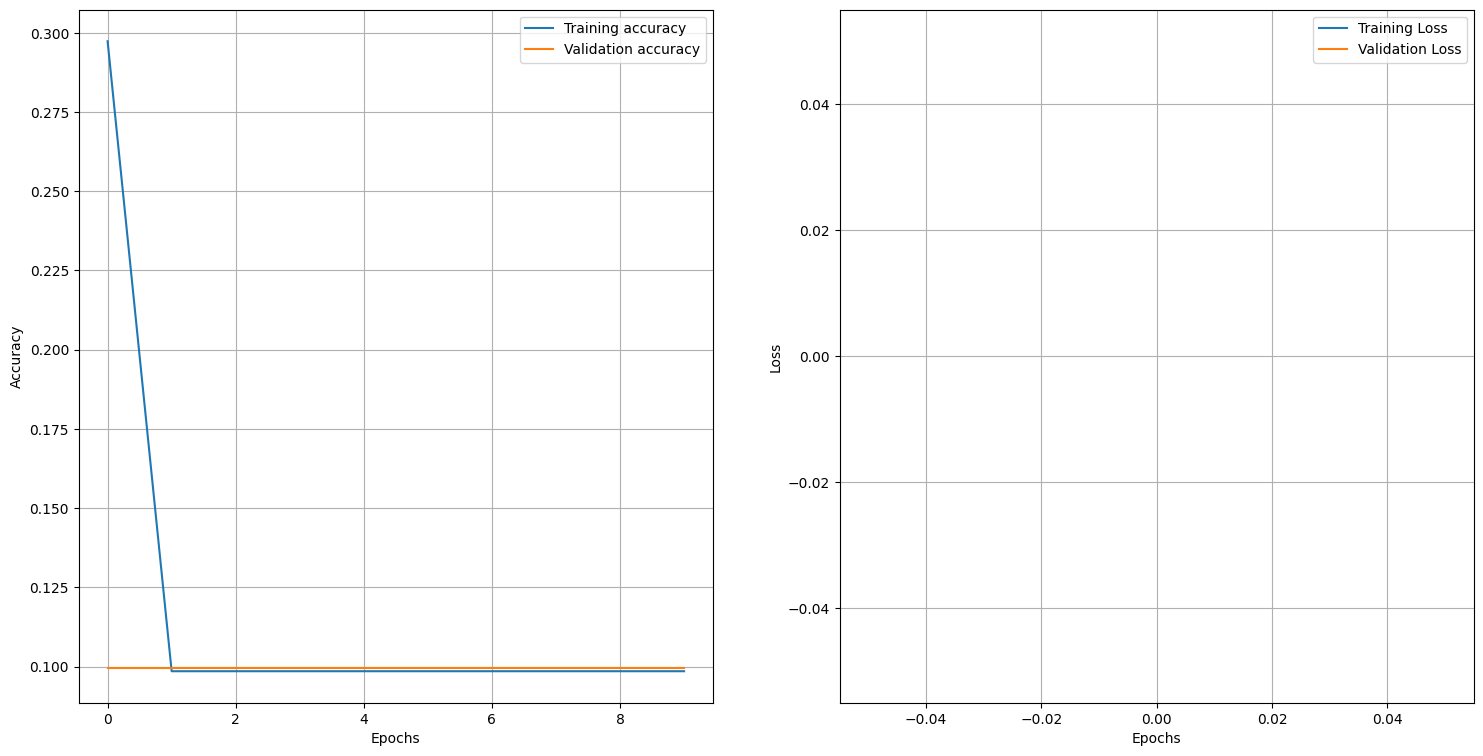

In [15]:
plt.figure(figsize=(18,9))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
vgg16_model = keras.applications.VGG16(input_shape=(32, 32, 3), include_top=False)
vgg16_model.trainable=False 

inputs = vgg16_model.inputs
x = vgg16_model.output

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

aug_model = Model(inputs, outputs)
aug_model.summary()

In [ ]:
aug_model.compile(optimizer=keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
early_stop=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=15)

In [ ]:
history=aug_model.fit(x_train1,y_train1,epochs=10,validation_split=0.2,callbacks=[early_stop])

In [ ]:
plt.figure(figsize=(18,9))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
loss1, accuracy1 = model.evaluate(x_test1, y_test1)


loss2, accuracy2 = aug_model.evaluate(x_test, y_test)
loss3, accuracy3 = aug_model.evaluate(x_test1, y_test1)

In [ ]:
import pandas as pd
from tabulate import tabulate

# Collect results into a dictionary
results = {
    'Non-Augmented Model': [f'{accuracy*100:.2f}%', f'{accuracy1*100:.2f}%'],
    'Augmented Model': [f'{accuracy2*100:.2f}%', f'{accuracy3*100:.2f}%']
}

# Create a DataFrame
df = pd.DataFrame(results, index=['Non-Augmented Data', 'Augmented Data']).T

# Use tabulate to format the DataFrame as a table
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))
